In [14]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder 
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC, SVC
import lazypredict
from lazypredict.Supervised import LazyClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

In [15]:
df= pd.read_csv('Job_Placement_Data.csv')
df.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               215 non-null    object 
 1   ssc_percentage       215 non-null    float64
 2   ssc_board            215 non-null    object 
 3   hsc_percentage       215 non-null    float64
 4   hsc_board            215 non-null    object 
 5   hsc_subject          215 non-null    object 
 6   degree_percentage    215 non-null    float64
 7   undergrad_degree     215 non-null    object 
 8   work_experience      215 non-null    object 
 9   emp_test_percentage  215 non-null    float64
 10  specialisation       215 non-null    object 
 11  mba_percent          215 non-null    float64
 12  status               215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


In [17]:
# checking duplicates
df.duplicated().sum()

0

In [18]:
# checking unique values of all variables
df.nunique()

gender                   2
ssc_percentage         103
ssc_board                2
hsc_percentage          97
hsc_board                2
hsc_subject              3
degree_percentage       89
undergrad_degree         3
work_experience          2
emp_test_percentage    100
specialisation           2
mba_percent            205
status                   2
dtype: int64

In [19]:
df.describe()

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent
count,215.00,215.00,215.00,215.00,215.00
mean,67.30,66.33,66.37,72.10,62.28
std,10.83,10.90,7.36,13.28,5.83
min,40.89,37.00,50.00,50.00,51.21
25%,60.60,60.90,61.00,60.00,57.95
50%,67.00,65.00,66.00,71.00,62.00
75%,75.70,73.00,72.00,83.50,66.25
max,89.40,97.70,91.00,98.00,77.89


In [20]:
#checking NaN values
df.isna().sum()

gender                 0
ssc_percentage         0
ssc_board              0
hsc_percentage         0
hsc_board              0
hsc_subject            0
degree_percentage      0
undergrad_degree       0
work_experience        0
emp_test_percentage    0
specialisation         0
mba_percent            0
status                 0
dtype: int64

#### EDA

<AxesSubplot:xlabel='status', ylabel='count'>

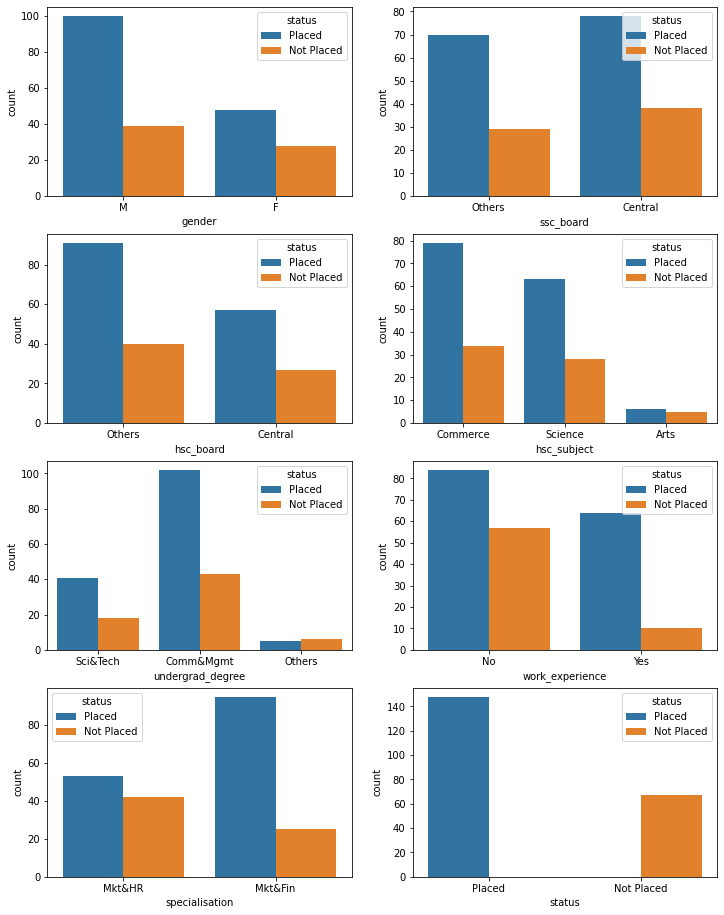

In [21]:
fig,axs = plt.subplots(nrows=4, ncols=2, figsize=(12,16))            
sns.countplot(data=df, x="gender",hue="status",  ax=axs[0,0])
sns.countplot(data=df, x="ssc_board",hue="status",ax=axs[0,1])
sns.countplot(data=df, x="hsc_board",hue="status", ax=axs[1,0])
sns.countplot(data=df, x="hsc_subject",hue="status", ax=axs[1,1])
sns.countplot(data=df, x="undergrad_degree",hue="status",  ax=axs[2,0])
sns.countplot(data=df, x="work_experience",hue="status", ax=axs[2,1])
sns.countplot(data=df, x="specialisation",hue="status", ax=axs[3,0])
sns.countplot(data=df, x="status",hue="status", ax=axs[3,1])

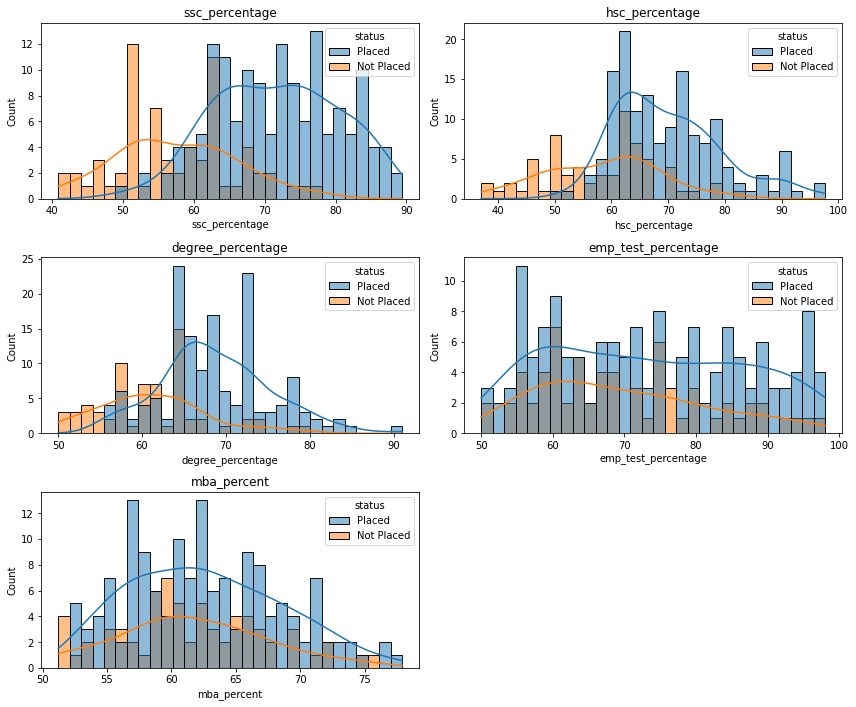

In [22]:
exp_feats=['ssc_percentage', 'hsc_percentage', 'degree_percentage', 'emp_test_percentage', 'mba_percent']

fig=plt.figure(figsize=(12,16))
for i, var_name in enumerate(exp_feats):
    ax=fig.add_subplot(5,2,i+1)
    sns.histplot(data=df, x=var_name, axes=ax, bins=30, kde=True, hue='status')
    ax.set_title(var_name)
    
fig.tight_layout()  
plt.show()

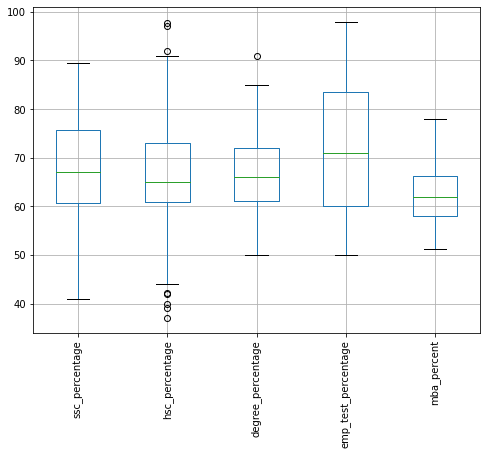

In [23]:
plt.figure(figsize=(8,6))
df.boxplot()
plt.xticks(rotation=90)
plt.show()


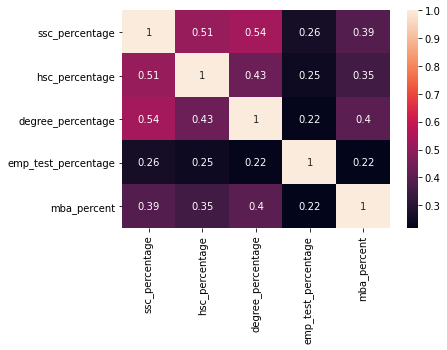

In [24]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

#### Preprocessing

In [25]:

numeric_features = ['ssc_percentage', 'hsc_percentage', 'degree_percentage', 'emp_test_percentage', 'mba_percent']
numeric_transformer = MinMaxScaler()

categorical_features = ["gender","hsc_subject", "ssc_board", "hsc_board","undergrad_degree", 'work_experience', 'specialisation', ] 
categorical_transformer = OneHotEncoder(handle_unknown="ignore")



preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat1", categorical_transformer, categorical_features),
        
    ]
)

In [26]:
y=df['status']
X=df.drop(['status'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0,)

In [27]:
clf2 = LazyClassifier(verbose=0,
                     ignore_warnings=True,
                     custom_metric=None,
                     predictions=False,
                     random_state=12,
                     classifiers='all')

models, predictions = clf2.fit(X_train , X_test , y_train , y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:04<00:00,  6.16it/s]


In [28]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearSVC,0.86,0.81,None,0.86,0.04
LinearDiscriminantAnalysis,0.86,0.81,None,0.86,0.05
RidgeClassifierCV,0.86,0.81,None,0.86,0.04
RidgeClassifier,0.86,0.81,None,0.86,0.04
LogisticRegression,0.86,0.81,None,0.86,0.04
Perceptron,0.85,0.80,None,0.84,0.03
BernoulliNB,0.82,0.79,None,0.82,2.12
GaussianNB,0.83,0.79,None,0.83,0.03
NearestCentroid,0.80,0.78,None,0.80,0.03


In [29]:


pipe = Pipeline(
    steps=[("preprocessor", preprocessor), ("clf", LinearSVC())]
)


grid={"clf__C":[0.01,0.1,1.0,10],
      "clf__penalty":['l1',"l2"],
    }
     

clf = GridSearchCV(pipe, grid, cv=5 )

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

clf.fit(X_train, y_train)
print(clf.best_params_)
y_pred=clf.predict(X_test)
print("model score: %.3f" % clf.score(X_test, y_test))

{'clf__C': 0.1, 'clf__penalty': 'l2'}
model score: 0.877


              precision    recall  f1-score   support

  Not Placed       0.92      0.63      0.75        19
      Placed       0.87      0.98      0.92        46

    accuracy                           0.88        65
   macro avg       0.89      0.80      0.83        65
weighted avg       0.88      0.88      0.87        65



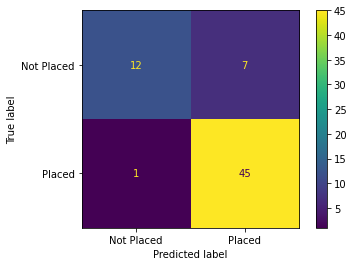

In [30]:

print(plot_confusion_matrix(clf, X_test, y_test))
print(classification_report(y_test, y_pred))